In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)

5.13.1


In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline(connected=True)
cf.set_config_file(offline=False, world_readable=True)

import excel in colab as dataframe

In [ ]:
#importing file
df = pd.read_excel('/COD_Data.xlsx')

In [ ]:
df.head(5)

,Order Date,Dispatch Date,Recd Date,Order #,Customer,SKU,Channel,Pin Code,Product Category,Product Type,Reason,Category
0,42321,42326,42339,DF1,suvidhi ahuja,UP00016-YG0000,Blue Dart,411040,Unstudded Jewellery,Pendant,Customer cancelled the order,Cancelled
1,42327,42327,42339,Y51,Dr Anju Verma,GC00032-2Y0000,Delhivery,389151,Gold Coin,Gold Coin,Customer is not responding,No Response
2,42307,42317,42339,CED,richa,JP00200-YGP900,HUB,600042,Studded Jewellery,Pendant,Bracelet is very tight,Product Quality
3,42323,42335,42339,N27,Seema batra,JN02829-YGP900,HUB,400066,Studded Jewellery,Nose Pin,Customer refused to accept,Refused
4,42323,42335,42339,N27,Shrishti Gulati,JT02891-YGP900,HUB,400066,Studded Jewellery,Bracelet,Customer refused to accept,Refused


In [ ]:
df.shape

(960, 12)

In [ ]:
#checking basic info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Date        960 non-null    int64 
 1   Dispatch Date     960 non-null    int64 
 2   Recd Date         960 non-null    int64 
 3   Order #           960 non-null    object
 4   Customer          960 non-null    object
 5   SKU               960 non-null    object
 6   Channel           960 non-null    object
 7   Pin Code          948 non-null    object
 8   Product Category  960 non-null    object
 9   Product Type      960 non-null    object
 10  Reason            960 non-null    object
 11  Category          960 non-null    object
dtypes: int64(3), object(9)
memory usage: 90.1+ KB


DATA CLEANING

In [ ]:
#checking no of null values in each row
df.isnull().sum()

Order Date           0
Dispatch Date        0
Recd Date            0
Order #              0
Customer             0
SKU                  0
Channel              0
Pin Code            12
Product Category     0
Product Type         0
Reason               0
Category             0
dtype: int64

In [ ]:
#deleting rows for which pincode is not available
pin_na =df['Pin Code'].isna()
to_drop = df[pin_na].index
df1 = df.drop(to_drop, axis=0)

In [ ]:
df1.shape

(948, 12)

In [ ]:
#Finding no. of days took for delivery
df1['Total_days'] = (df['Recd Date']-df['Order Date'])
df1['days_for_dispatch'] = (df['Dispatch Date']-df['Order Date'])
df1['days_for_delivery'] = (df['Recd Date']-df['Dispatch Date'])
df2 = df1.drop(['Order Date','Dispatch Date','Recd Date'], axis=1)

In [ ]:
df2.head(5)

,Order #,Customer,SKU,Channel,Pin Code,Product Category,Product Type,Reason,Category,Total_days,days_for_dispatch,days_for_delivery
0,DF1,suvidhi ahuja,UP00016-YG0000,Blue Dart,411040,Unstudded Jewellery,Pendant,Customer cancelled the order,Cancelled,18,5,13
1,Y51,Dr Anju Verma,GC00032-2Y0000,Delhivery,389151,Gold Coin,Gold Coin,Customer is not responding,No Response,12,0,12
2,CED,richa,JP00200-YGP900,HUB,600042,Studded Jewellery,Pendant,Bracelet is very tight,Product Quality,32,10,22
3,N27,Seema batra,JN02829-YGP900,HUB,400066,Studded Jewellery,Nose Pin,Customer refused to accept,Refused,16,12,4
4,N27,Shrishti Gulati,JT02891-YGP900,HUB,400066,Studded Jewellery,Bracelet,Customer refused to accept,Refused,16,12,4


Analysing Data


In [ ]:
df['Reason'].value_counts()

No response from the customer           123
Customer did not like the product        63
Customer refused to accept               51
No Response from the customer            46
No Response from the Customer            45
                                       ... 
Customer is not avalible                  1
Out of station for extended duration      1
Incorrect addres, no response             1
Customer wants to cancel                  1
Customer phone not reachable              1
Name: Reason, Length: 335, dtype: int64

In [ ]:
df['Reason'].unique()

array(['Customer cancelled the order', 'Customer is not responding',
       'Bracelet is very tight', 'Customer refused to accept',
       'Consignee Refused To Accept',
       'Customer wants to cancel the order', 'Customer is out of station',
       'Due to bad climate shipment undelivered',
       'Customer didnot like the product quality',
       'Consignee Refused To Accept ',
       'Customer is not responding the call', 'Customer did not like ',
       'Customer did not like the product', 'No Response',
       'Customer requested for early delivery so order cancelled',
       'Customer number is not reachable no response',
       'Customer no longer need the product, order cancelled',
       'Customer not available, No response from customer',
       'No answer from the customer, No response',
       'Does not want the product',
       'Customer is out of station will order later',
       'No answer from the customer',
       'Customer requested to cancel the order',
       'No 

In [ ]:
#checking for which delivery service more delivery issues are noted
filter_value = 'Delay'
filtered_data = df2[df2['Category'] == filter_value]
ch_df= (filtered_data['Channel']).value_counts()
ch_df

Blue Dart      7
Delhivery      6
HUB            2
Wow Express    2
Sequel         1
Name: Channel, dtype: int64

<Axes: >

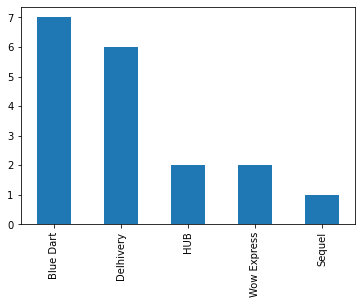

In [ ]:
ch_df.plot(kind= 'bar')

<Axes: >

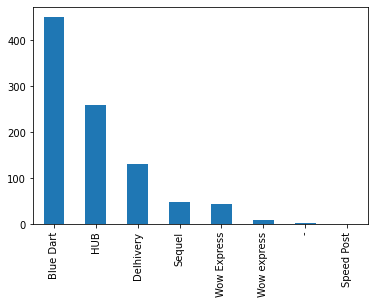

In [ ]:
ch2_df= (df2['Channel']).value_counts()
ch2_df.plot(kind = 'bar')

<Axes: xlabel='days_for_delivery'>

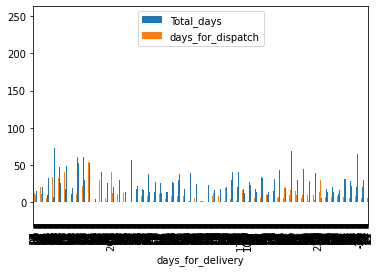

In [ ]:
#checking which delivery service is taking more days to deliver
df2.plot(kind='bar',x='days_for_delivery')

In [ ]:
channel_counts = {}
for index, row in df2.iterrows():
    if row['days_for_delivery'] > 21:
        channel = row['Channel']
        if channel not in channel_counts:
            channel_counts[channel] = 1
        else:
            channel_counts[channel] += 1

for channel, count in channel_counts.items():
    print(f" {channel} - {count} times.")

 HUB - 66 times.
 Blue Dart - 68 times.
 Sequel - 28 times.
 Delhivery - 13 times.
 Wow Express - 23 times.
 - - 2 times.
 Wow express - 5 times.


In [ ]:
#checking which product category is having product issues more
filter_value = 'Product Quality'
filtered_data = df2[df2['Category'] == filter_value]
pc_df = (filtered_data['Product Category']).value_counts()
pc_df

Studded Jewellery      12
Unstudded Jewellery     1
Name: Product Category, dtype: int64

<Axes: >

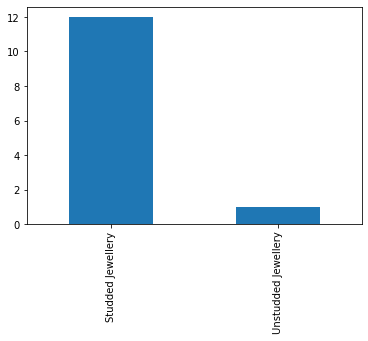

In [ ]:
pc_df.plot(kind= 'bar')

In [ ]:
#checking which product type is having product issue more
filter_value = 'Product Quality'
filtered_data = df2[df2['Category'] == filter_value]
pt_df =(filtered_data['Product Type']).value_counts()
pt_df

Bracelet     8
Pendant      2
Nose Pin     1
Ring         1
Necklace     1
Name: Product Type, dtype: int64

<Axes: >

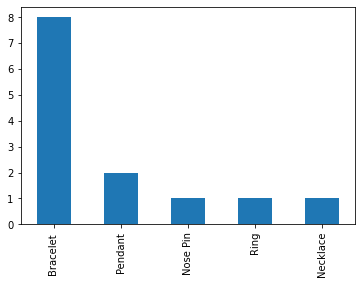

In [ ]:
pt_df.plot(kind ='bar')

In [ ]:
#checking whether the same customer is cancelling the product multiple types
df2['Customer'].value_counts()

shweta negi           10
Rashmi Khan            9
Dr. swati bhansali     6
rashmi khan            6
Ankit Agarwal          5
                      ..
Veena S Kumar          1
Rita                   1
K K Jain               1
Shipra Sharma          1
GARIMA GOYAL           1
Name: Customer, Length: 803, dtype: int64

In [ ]:
# filtering the dataframe for the repeated value printing the corresponding value in other column along with repeating item
i=0
repeated_value = df['Customer'].value_counts()[df['Customer'].value_counts() > 3].index.tolist()[i]

filtered_df = df[df['Customer'] == repeated_value]

for index, row in filtered_df.iterrows():
    print(f"Repeating item: {repeated_value}, Corresponding value in Category: {row['Category']}")
   

Repeating item: shweta negi, Corresponding value in Category: Did not like
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: Out of Station
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: Out of Station
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: No Response
Repeating item: shweta negi, Corresponding value in Category: Refused


<Axes: xlabel='Pin Code'>

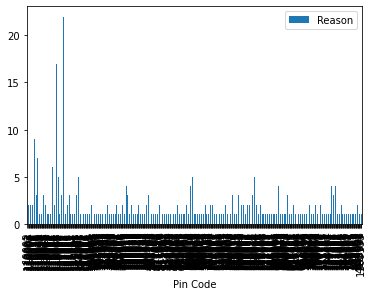

In [ ]:
#checking whether is there any trend with pincode in cancelling
pincode_counts = df.groupby('Pin Code')['Reason'].count().reset_index()
pincode_counts.plot(kind='bar', x='Pin Code', y='Reason')